In [11]:
import matplotlib.pyplot as plt
import cv2 as cv 
import numpy as np

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- Load Random Images

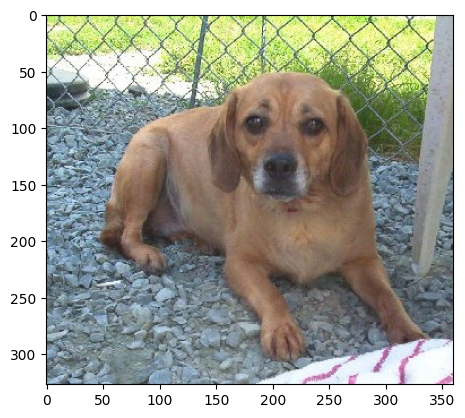

In [13]:
file_name = "../../data/CATS_DOGS/train/DOG/"+str(np.random.randint(0, 5000))+".jpg"

random_dog = cv.cvtColor(cv.imread(file_name),cv.COLOR_BGR2RGB)
plt.imshow(random_dog)

In [14]:
generator = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

The provided code snippet initializes an instance of the 

ImageDataGenerator is a class from the TensorFlow Keras API. This class is used for real-time data augmentation, which is a technique to artificially expand the size of a training dataset by creating modified versions of images. Data augmentation helps improve the generalization ability of a machine learning model by introducing variations in the training data. 
 
Here's a detailed explanation of each parameter used

### Parameters

1. **rotation_range=30**:
   - This parameter specifies the range (in degrees) within which to randomly rotate the images. In this case, images will be randomly rotated by up to 30 degrees clockwise or counterclockwise. Rotation helps the model become invariant to the orientation of objects in the images.

2. **width_shift_range=0.1**:
   - This parameter specifies the range (as a fraction of the total width) within which to randomly shift the images horizontally. A value of 0.1 means the images can be shifted left or right by up to 10% of their width. Horizontal shifts help the model become invariant to the horizontal position of objects.

3. **height_shift_range=0.1**:
   - This parameter specifies the range (as a fraction of the total height) within which to randomly shift the images vertically. A value of 0.1 means the images can be shifted up or down by up to 10% of their height. Vertical shifts help the model become invariant to the vertical position of objects.

4. **rescale=1/255**:
   - This parameter rescales the pixel values of the images by the specified factor. In this case, pixel values are divided by 255 to normalize them to the range [0, 1]. Normalization is important for ensuring that the model trains effectively, as it helps stabilize the learning process.

5. **shear_range=0.2**:
   - This parameter specifies the shear intensity (as a fraction) to apply to the images. Shearing involves slanting the shape of the objects in the images, which helps the model become invariant to such distortions. A value of 0.2 means the images can be sheared by up to 20%.

6. **zoom_range=0.2**:
   - This parameter specifies the range for randomly zooming in or out on the images. A value of 0.2 means the images can be zoomed in or out by up to 20%. Zooming helps the model become invariant to the scale of objects in the images.

7. **horizontal_flip=True**:
   - This parameter specifies whether to randomly flip the images horizontally. Setting it to `True` means that images will be randomly flipped along the vertical axis. Horizontal flipping helps the model become invariant to the left-right orientation of objects.

8. **fill_mode='nearest'**:
   - This parameter specifies the strategy to use for filling in new pixels that are created during transformations such as rotation or shifting. The `'nearest'` mode means that the new pixels will be filled with the nearest pixel values from the original image. This helps maintain the integrity of the image content during augmentation.

### Summary

In summary, the ImageDataGenerator instance image_data is configured to perform various data augmentation techniques, including rotation, shifting, rescaling, shearing, zooming, and horizontal flipping. These augmentations introduce variations in the training data, helping the model generalize better to new, unseen data. The `fill_mode='nearest'` ensures that new pixels created during transformations are filled appropriately. Data augmentation is a powerful technique to improve the robustness and performance of machine learning models, especially in image classification tasks.

- Test generator

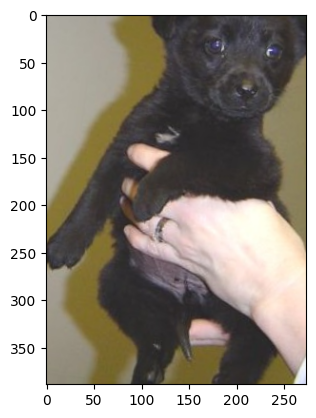

In [15]:
random_dog = cv.cvtColor(
    cv.imread("../../data/CATS_DOGS/train/DOG/200.jpg"), cv.COLOR_BGR2RGB)
plt.imshow(generator.random_transform(random_dog))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense,Input

In [17]:
model = Sequential()

model.add(Input(shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2024-11-08 13:21:47.729305: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,479,425 (9.46 MB)

 Trainable params: 2,479,425 (9.46 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
batch_size = 16 

train_image_data = generator.flow_from_directory("../../data/CATS_DOGS/train",target_size=(150,150),batch_size=batch_size,class_mode='binary')

Found 18743 images belonging to 2 classes.


In [20]:
batch_size = 16

test_image_data = generator.flow_from_directory("../../data/CATS_DOGS/test", target_size=(150,150),batch_size=batch_size,class_mode='binary')

Found 6251 images belonging to 2 classes.


In [ ]:
results = model.fit(train_image_data, epochs=10, steps_per_epoch=200)

/home/dododoyo/Documents/ML/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
